In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Country-data.csv')

In [3]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

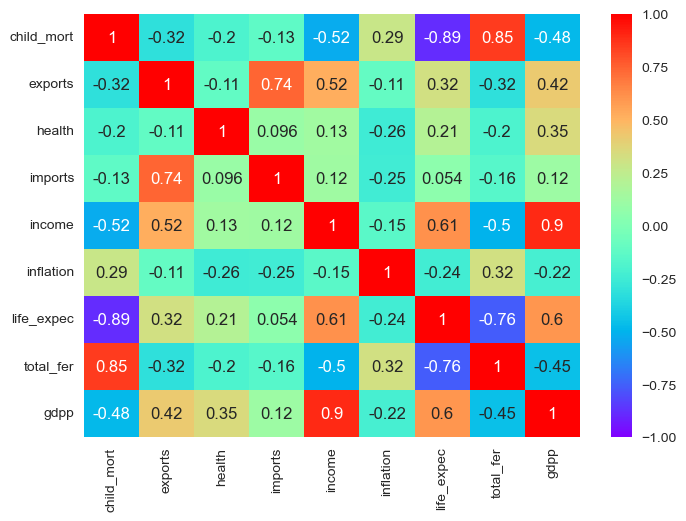

In [6]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='rainbow')
plt.show()

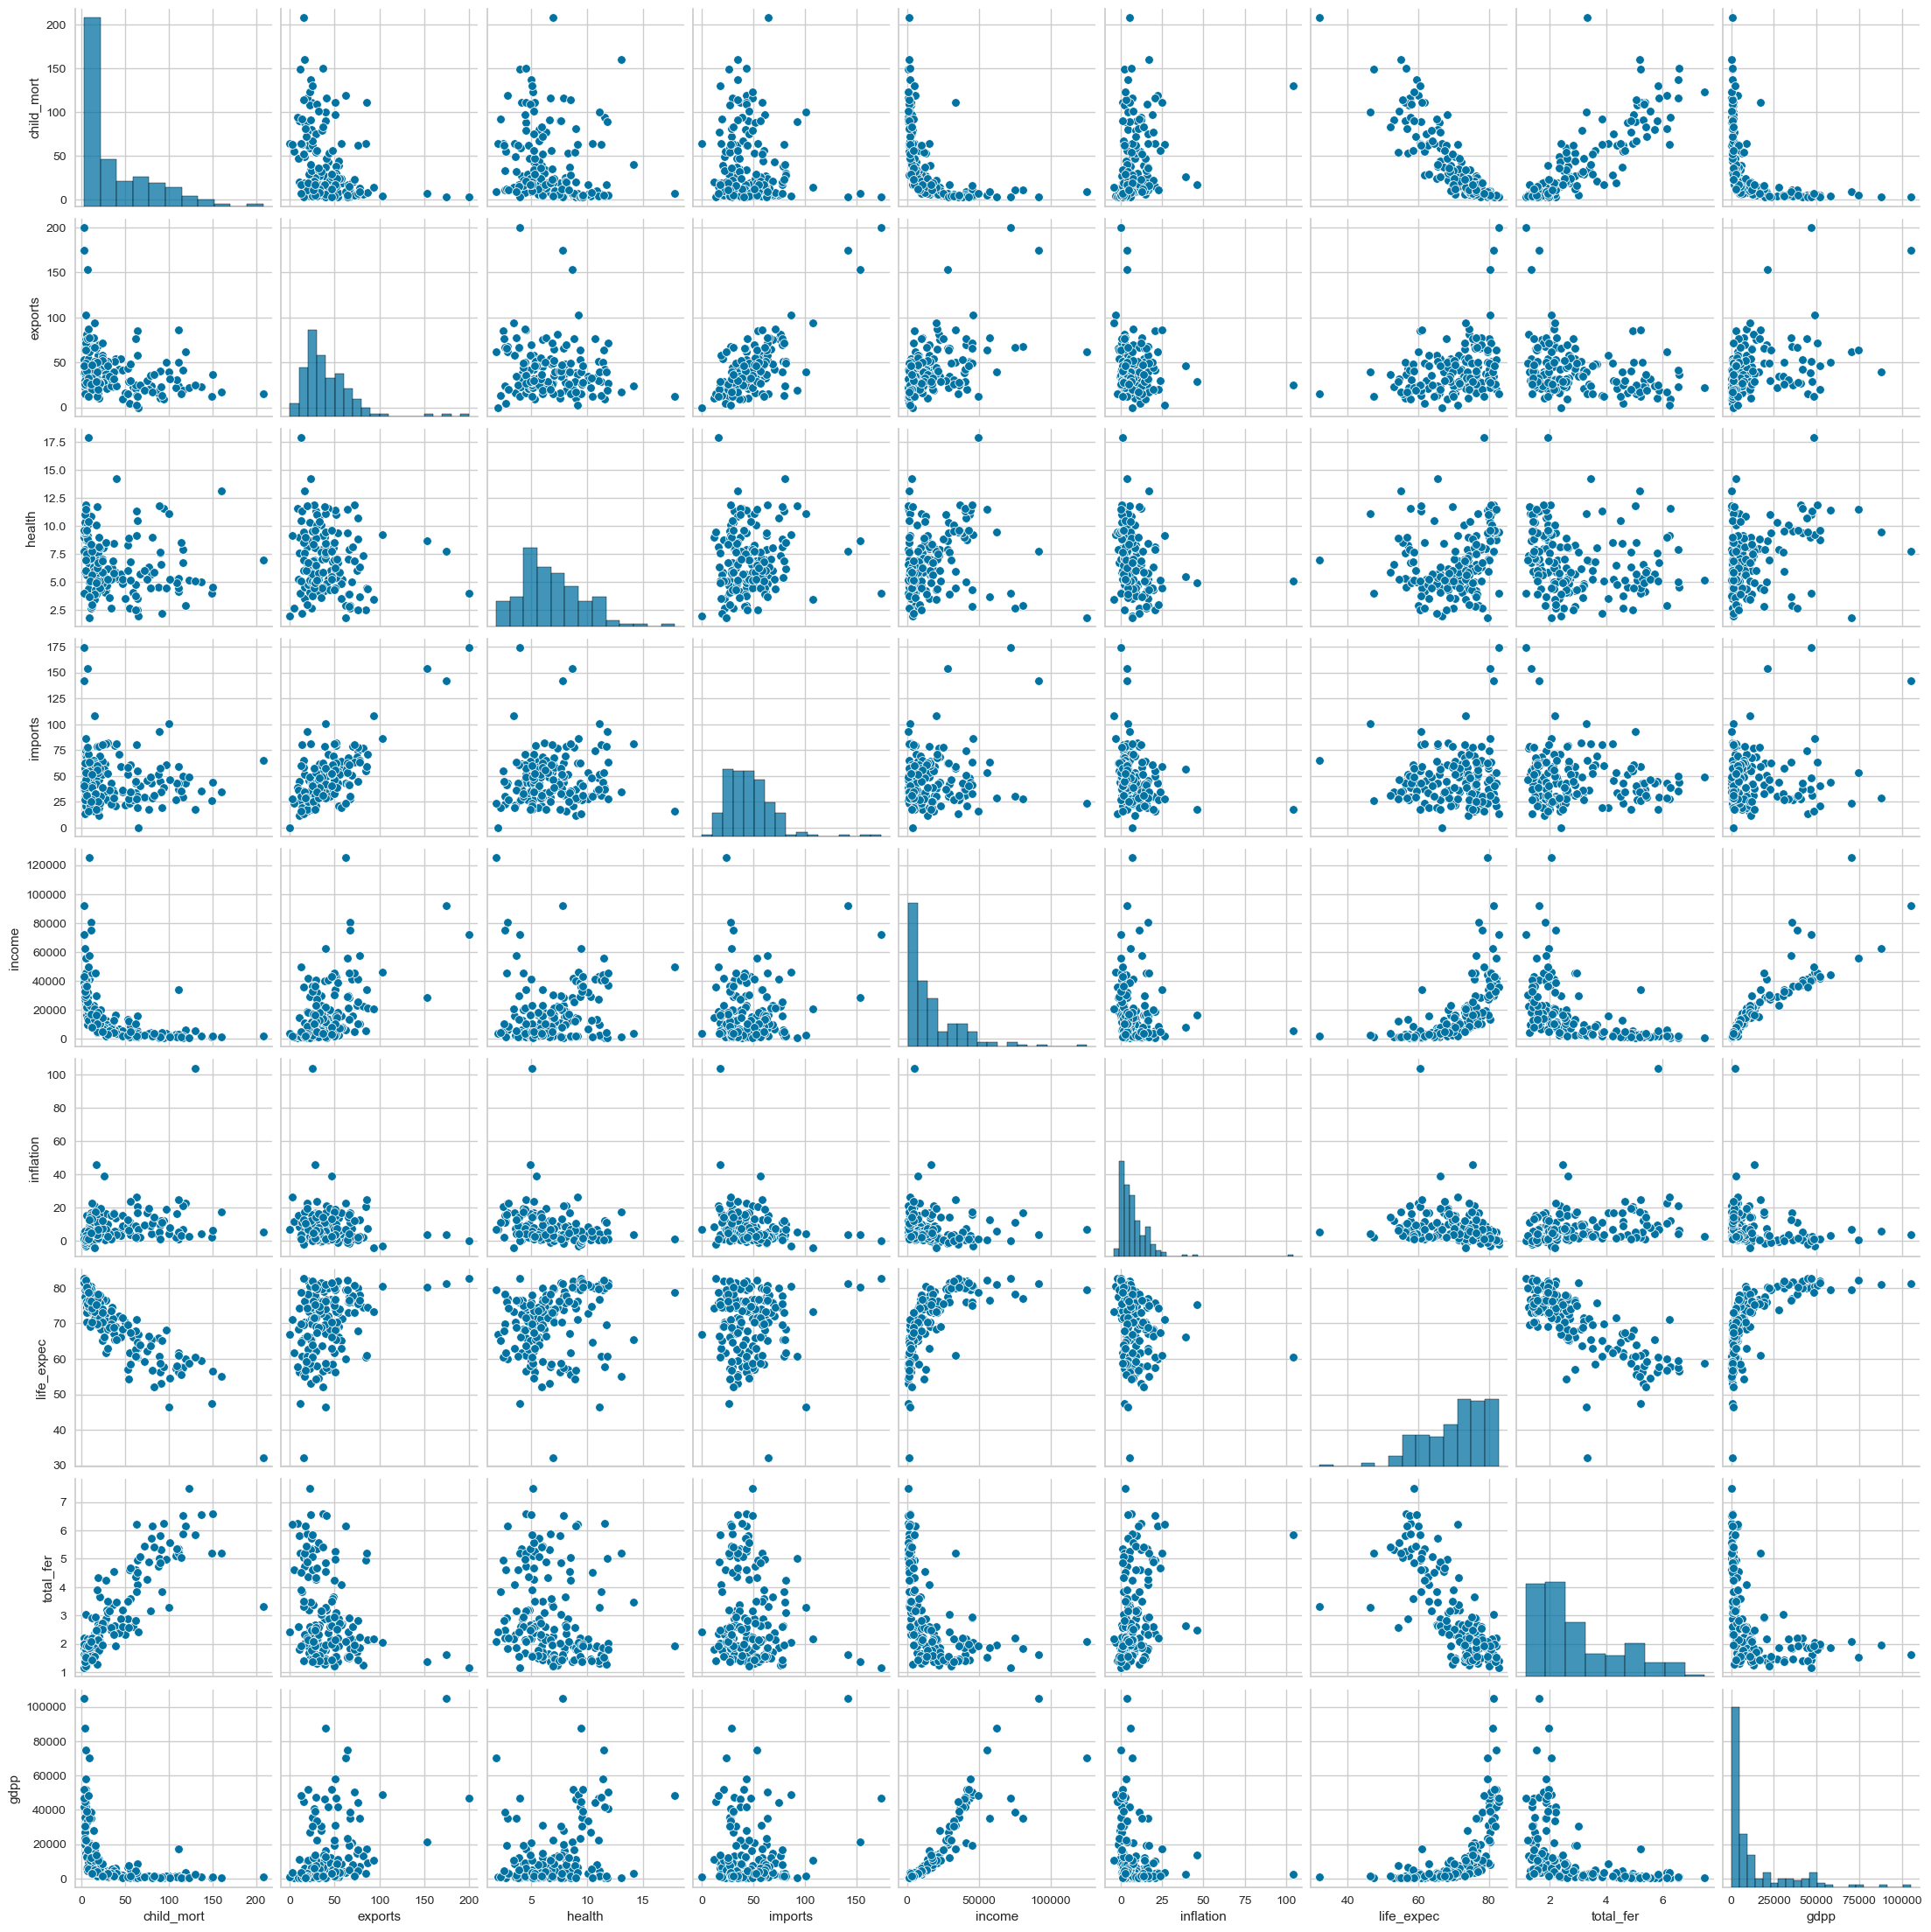

In [7]:
sns.pairplot(data)
plt.show()

## Lets Reduce the data using PCA

In [8]:
df = data.copy()

In [9]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [10]:
del df['country']

In [11]:
sc = StandardScaler()

In [12]:
df_scaled = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [13]:
df_scaled

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [14]:
pca = PCA(n_components=9)
pca_data = pca.fit_transform(df_scaled)

In [15]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

### Lets reduce the data to 5 PC's

In [17]:
pca = PCA(n_components=5)

In [18]:
pca_data = pd.DataFrame(pca.fit_transform(df_scaled),columns = ['PC1','PC2','PC3','PC4','PC5'])

In [19]:
pca_data

PC1       PC2       PC3       PC4       PC5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

## Apply the K-Means Clustering

In [20]:
k_elbow = KElbowVisualizer(KMeans(),k=10)

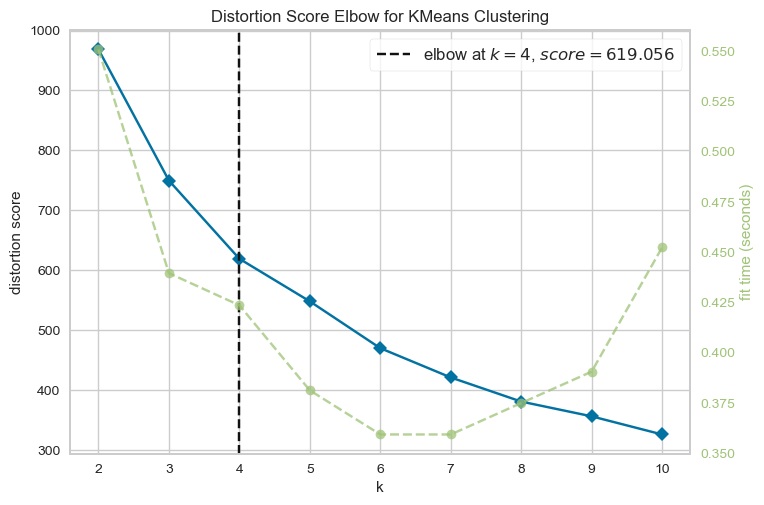

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
k_elbow.fit(pca_data)
k_elbow.show()

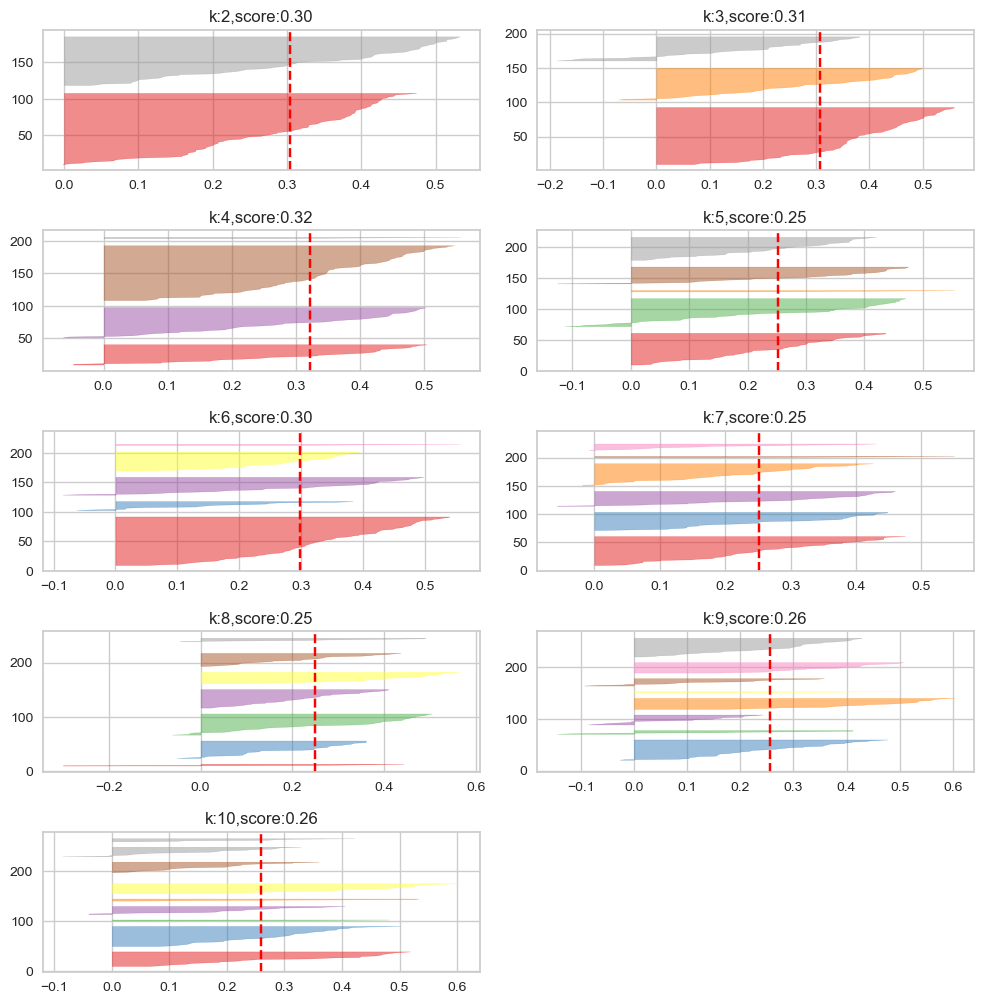

In [22]:
t=1
plt.figure(figsize=(10,16))
for i in range(2,11):
    plt.subplot(8,2,t)
    model= KMeans(n_clusters=i)
    sil_viz= SilhouetteVisualizer(model)
    sil_viz.fit(pca_data)
    plt.title('k:%d,score:%.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

## Lets go with k=4

In [23]:
final_kmeans = KMeans(n_clusters=3)

In [24]:
data['Class'] = final_kmeans.fit_predict(pca_data)

In [25]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Class  
0         9.44        56.2       5.82    553      1  
1         4.49        76.3       1.65   4090      2  
2        16.10        76.5       2.89   4460      2  
3        22.40        60.1       6.16   3530      1  
4         1.44        76.8       2.13  12200      2  
..         ...         ...        ...    ...    ...  
162       2.62        63.0       3.50   2970      2  
163      45.90        75.4       2.47  13500      2  
164      12.10        73.1       1.95   1310      2  
165      23.60        67.5       4.67   1310      1  
166      14.00        52.0       5.40   1460      1  

[167 rows x 11 columns]

## Visualize the data

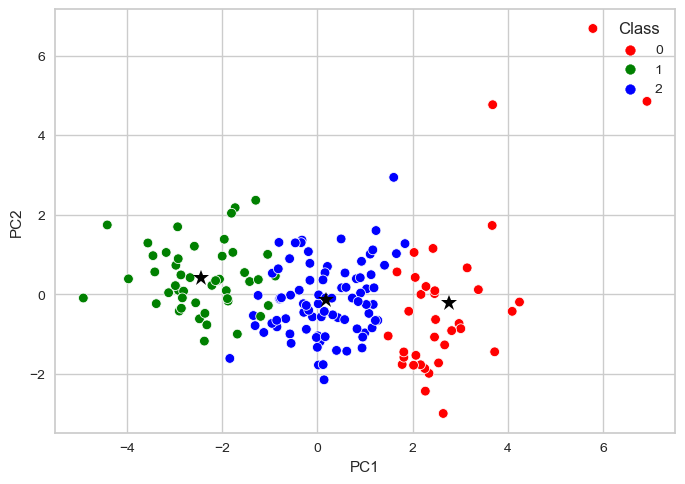

In [26]:
centroids = final_kmeans.cluster_centers_

sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=data['Class'],palette=['red','green','blue'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)

In [27]:
data[data['Class']==2]

country  child_mort  exports  health  imports  income  \
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5              Argentina        14.5     18.9    8.10     16.0   18700   
6                Armenia        18.1     20.8    4.40     45.3    6700   
..                   ...         ...      ...     ...      ...     ...   
160              Uruguay        10.6     26.3    8.35     25.4   17100   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   

     inflation  life_expec  total_fer   gdpp  Class  
1         4.49        76.3       1.65   4090      2  
2        16.10        76.5       2.89   4460      2  
4         1.44        76.8       2.13  12200      2  
5        20.90        75.8       2.37  10300      2  
6         7.77        73.3       1.69   3220      2  
..         ...         ...        ...    ...    ...  
160       4.91        76.4       2.08  11900      2  
161      16.50        68.8       2.34   1380      2  
162       2.62        63.0       3.50   2970      2  
163      45.90        75.4       2.47  13500      2  
164      12.10        73.1       1.95   1310      2  

[84 rows x 11 columns]

In [28]:
data[data['Class']==0]

country  child_mort  exports  health  imports  income  \
7               Australia         4.8     19.8    8.73     20.9   41400   
8                 Austria         4.3     51.3   11.00     47.8   43200   
11                Bahrain         8.6     69.5    4.97     50.9   41100   
15                Belgium         4.5     76.4   10.70     74.7   41100   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
29                 Canada         5.6     29.1   11.30     31.0   40700   
42                 Cyprus         3.6     50.2    5.97     57.5   33900   
43         Czech Republic         3.4     66.0    7.88     62.9   28300   
44                Denmark         4.1     50.5   11.40     43.6   44000   
53                Finland         3.0     38.7    8.95     37.4   39800   
54                 France         4.2     26.8   11.90     28.1   36900   
58                Germany         4.2     42.3   11.60     37.1   40400   
60                 Greece         3.9     22.1   10.30     30.7   28700   
68                Iceland         2.6     53.4    9.40     43.3   38800   
73                Ireland         4.2    103.0    9.19     86.5   45700   
74                 Israel         4.6     35.0    7.63     32.9   29600   
75                  Italy         4.0     25.2    9.53     27.2   36200   
77                  Japan         3.2     15.0    9.49     13.6   35800   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
98                  Malta         6.8    153.0    8.65    154.0   28300   
110           Netherlands         4.5     72.0   11.90     63.6   45500   
111           New Zealand         6.2     30.3   10.10     28.0   32300   
114                Norway         3.2     39.7    9.48     28.5   62300   
122              Portugal         3.9     29.9   11.00     37.4   27200   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
133             Singapore         2.8    200.0    3.96    174.0   72100   
134       Slovak Republic         7.0     76.3    8.79     77.8   25200   
135              Slovenia         3.2     64.3    9.41     62.9   28700   
138           South Korea         4.1     49.4    6.93     46.2   30400   
139                 Spain         3.8     25.5    9.54     26.8   32500   
144                Sweden         3.0     46.2    9.63     40.7   42900   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer    gdpp  Class  
7        1.160        82.0       1.93   51900      0  
8        0.873        80.5       1.44   46900      0  
11       7.440        76.0       2.16   20700      0  
15       1.880        80.0       1.86   44400      0  
23      16.700        77.1       1.84   35300      0  
29       2.870        81.3       1.63   47400      0  
42       2.010        79.9       1.42   30800      0  
43      -1.430        77.5       1.51   19800      0  
44       3.220        79.5       1.87   58000      0  
53       0.351        80.0       1.87   46200      0  
54       1.050        81.4       2.03   40600      0  
58       0.758        80.1       1.39   41800      0  
60       0.673        80.4       1.48   26900      0  
68       5.470        82.0       2.20   41900      0  
73      -3.220        80.4       2.05   48700      0  
74       1.770        81.4       3.03   30600      0  
75       0.319        81.7       1.46   35800      0  
77      -1.900        82.8       1.39   44500      0  
82      11.200        78.2       2.21   38500      0  
91       3.620        81.3       1.63  105000      0  
98       3.830        80.3       1.36   21100      0  
110      0.848        80.7      

In [29]:
data[data['Class']==1]

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
3                      Angola       119.0    62.30    2.85     42.9    5900   
17                      Benin       111.0    23.80    4.10     37.2    1820   
21                   Botswana        52.5    43.60    8.30     51.3   13300   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
55                      Gabon        63.7    57.70    3.50     18.9   15400   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
72                       Iraq        36.9    39.40    8.41     34.1   12700   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
84                        Lao        78.9    35.40    4.47     49.3    3980   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
106                Mozambique       101.0    31.50    5.21     46.2     918   
108                   Namibia        56.0    47.80    6.78     60.7    8460   
112                     Niger       123.0    22.20    5.16     49.1     814   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
137              South Africa        53.7    28.60    8.94     27.4   12000   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Class  
0        9.440        56.2       5.82    553      1  
3       22.400        60.1       6.16   3530      1  
17       0.885        61.8       5.36    758      1  
21       8.92

In [30]:
data.groupby(by='Class').mean()

child_mort    exports    health    imports        income  inflation  \
Class                                                                        
0        5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   
1       92.961702  29.151277  6.388511  42.323404   3942.404255  12.019681   
2       21.927381  40.243917  6.200952  47.473404  12305.595238   7.600905   

       life_expec  total_fer          gdpp  
Class                                       
0       80.127778   1.752778  42494.444444  
1       59.187234   5.008085   1922.382979  
2       72.814286   2.307500   6486.452381

In [31]:
## Lets Assuming categories to these Labels
data['Class'] = data['Class'].map({0:'Poor',1:'Rich',2:'Average'})

In [32]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp    Class  
0         9.44        56.2       5.82    553     Rich  
1         4.49        76.3       1.65   4090  Average  
2        16.10        76.5       2.89   4460  Average  
3        22.40        60.1       6.16   3530     Rich  
4         1.44        76.8       2.13  12200  Average  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970  Average  
163      45.90        75.4       2.47  13500  Average  
164      12.10        73.1       1.95   1310  Average  
165      23.60        67.5       4.67   1310     Rich  
166      14.00        52.0       5.40   1460     Rich  

[167 rows x 11 columns]

## Lets show these countries on the world map

In [33]:
import plotly.express as px

In [34]:
fig = px.choropleth(data_frame=data[['country','Class']],locations='country',color=data['Class'],locationmode='country names',
                    color_discrete_map={'Rich':'Red','Average':'Blue','Poor':'yellow'})
fig.show()